In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold


from sklearn.metrics import confusion_matrix,classification_report

print('run successfully')

C:\Users\Danish\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


run successfully


In [2]:
# CLEANING THE DATA AND CHANGING THE CATAGORICAL VALUE INTO DESIRED values
data = pd.read_csv(r'C:\Users\Danish\Downloads\drug200.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Danish\\Downloads\\drug200.csv'

In [4]:
                # Simple Cleaning of Data 
# CHANGE SEX CATAGORY INTO NUMERIC VALUE
data['Sex']=data['Sex'].apply(lambda x: 0 if x=='F' else 1)

# CHANGE PB CATAGORY INTO NUMERIC VALUE
data['BP']=data['BP'].apply(
    lambda x: 0 if x=='LOW' else 1 if x=='HIGH' else 0.5)

# CHANGE CHALESTEROL CATAGORY INTO NUMERIC VALUE
data['Cholesterol']=data['Cholesterol'].apply(
    lambda x: 0.5 if x=="NORMAL" else 1)

# CHANGING THE drug-x,drug-y...... in X,Y,C.... lABELS.......
data['Drug']=data['Drug'].apply(lambda x: list(x)[-1])

# Seperate Target value from the Data

yy = data['Drug']
xx=data.drop(columns=['Drug'])
print('Run successfully')

Run successfully


In [7]:
#     SPLITTING THE DATA FOR TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.20, random_state=1, stratify=yy)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Run successfully')

(160, 5) (40, 5) (160,) (40,)
Run successfully


In [21]:
# Create KNN classifier
KNN_algorithm = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier to the data
KNN_algorithm.fit(X_train,y_train)
print('Run successfully')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Run successfully


In [14]:
KNN_algorithm.predict(X_test)[:10]
print(KNN_algorithm.score(X_test, y_test)*100)

print('Run successfully')

65.0
Run successfully


In [16]:
y_pred=KNN_algorithm.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           A       0.44      0.80      0.57         5
           B       0.00      0.00      0.00         3
           C       0.50      0.33      0.40         3
           X       0.56      0.45      0.50        11
           Y       1.00      0.89      0.94        18

   micro avg       0.65      0.65      0.65        40
   macro avg       0.50      0.50      0.48        40
weighted avg       0.70      0.65      0.66        40



In [18]:
cm = confusion_matrix(y_test,y_pred)

pd.DataFrame(cm,columns=sorted(yy.unique()),index=sorted(yy.unique()))

,A,B,C,X,Y
A,4,0,1,0,0
B,0,0,0,3,0
C,1,0,1,1,0
X,2,4,0,5,0
Y,2,0,0,0,16


In [48]:
#create a new KNN model
knn_algorithm_cv = KNeighborsClassifier(n_neighbors=15)
#train model with cv of 5 
cv_scores = cross_val_score(knn_algorithm_cv, xx, yy, cv=3)
print("cv_scores mean:{}".format(np.mean(cv_scores)))




In [ ]:
# sns.distplot(a=data['Na_to_K'])
# plt.show()
# sns.scatterplot(data=data,x=data['Na_to_K'],y=data['Age'],hue=data['Drug'])
# plt.show()
# sns.scatterplot(data=data,x=data['Na_to_K'],y=data['Age'],hue=data['Sex'])
# plt.show()

In [25]:
# import seaborn as sns

# plt.figure(figsize=(7,5))
# sns.heatmap(cm,annot=True)
# plt.ylabel("predict")
# plt.xlabel("truth")


Text(0.5, 1.0, 'counts of observations in Sex')

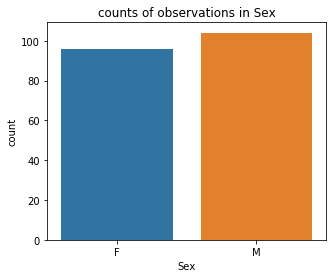

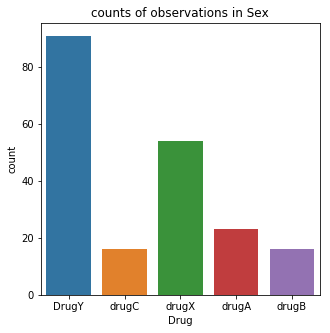

In [24]:
data.dtypes
data.info()
data.describe()
data.select_dtypes(include="object")
data.select_dtypes(exclude="object")
data['Sex'].value_counts()
# PLOTING EDA
plt.figure(figsize=(5,4))
sns.countplot(data['Sex'])
plt.title('counts of observations in Sex')
# ploting eda for drug
plt.figure(figsize=(5,5))
sns.countplot(data['Drug'])
plt.title('counts of observations in Sex')